In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [9]:
fluprint_export = pd.read_csv("fluprint_export.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [10]:
# Look at the first 5 rows

In [11]:
fluprint_export.head()

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,ebv_status,bmi,vaccine,geo_mean,d_geo_mean,vaccine_response,mesurment_id,assay,name,name_formatted,subset,units,data,statin_use,flu_vaccination_history,total_vaccines_received,vaccinated_1yr_prior,vaccine_type_1yr_prior,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,0.0,NaN,4.0,380.55,1.0,0.0,371121,4,B cells,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40,0.0,1.0,11.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,0.0,NaN,4.0,380.55,1.0,0.0,371122,4,basophils,basophils,CD123+HLADR-,% of Parent,1.45,0.0,1.0,11.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,0.0,NaN,4.0,380.55,1.0,0.0,371123,4,CD16+ monocytes,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85,0.0,1.0,11.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,0.0,NaN,4.0,380.55,1.0,0.0,371124,4,CD16+CD14+ monocytes,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55,0.0,1.0,11.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,0.0,NaN,4.0,380.55,1.0,0.0,371125,4,CD16+CD14- monocytes,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46,0.0,1.0,11.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


In [12]:
# Make a dataframe that only contains the rows with measurements of cells ('data' = '% of Parent')

In [13]:
flu_cells = fluprint_export[fluprint_export.units == '% of Parent'] 

In [14]:
# Make the dataframe more compact and remove unnecessary columns

In [15]:
# Combine the indices of the columns to drop
columns_to_drop = list(range(1, 15)) + list(range(16, 19)) + list(range(20,22)) + list(range(23, len(fluprint_export.columns)))

# Drop the unnecessary columns
flu_cells_comp = flu_cells.drop(fluprint_export.columns[columns_to_drop], axis=1)
flu_cells_comp.head()

,donor_id,vaccine_response,name_formatted,data
0,813,0.0,B_cells,34.40
1,813,0.0,basophils,1.45
2,813,0.0,CD16_pos_monocytes,5.85
3,813,0.0,CD16_pos_CD14_pos_monocytes,1.55
4,813,0.0,CD16_pos_CD14_neg_monocytes,4.46


In [16]:
# Remove the rows with missing values for 'vaccine_response'

In [17]:
flu_cells_clean = flu_cells_comp.dropna(subset=['vaccine_response'])
print(flu_cells_clean)

        donor_id  vaccine_response                   name_formatted   data
0            813               0.0                          B_cells  34.40
1            813               0.0                        basophils   1.45
2            813               0.0               CD16_pos_monocytes   5.85
3            813               0.0      CD16_pos_CD14_pos_monocytes   1.55
4            813               0.0      CD16_pos_CD14_neg_monocytes   4.46
...          ...               ...                              ...    ...
155845         3               0.0  Th2_non_neg_TFH_CD8_pos_T_cells   9.71
155846         3               0.0          Th2_TFH_CD4_pos_T_cells  34.90
155847         3               0.0          Th2_TFH_CD8_pos_T_cells   1.84
155848         3               0.0             transitional_B_cells   6.51
155849         3               0.0                            Tregs   3.01

[25313 rows x 4 columns]


In [18]:
# Find duplicates of 'name_formatted' for one 'donor_id' and remove them so we can pivote the dataframe

In [19]:
# Find duplicates
duplicates = flu_cells_clean[flu_cells_clean.duplicated(subset=['donor_id', 'name_formatted'], keep=False)]
print(duplicates)

# Remove the duplicates
flu_cells_clean_unique = flu_cells_clean.drop_duplicates(subset=['donor_id', 'name_formatted'])
print(flu_cells_clean_unique)

       donor_id  vaccine_response       name_formatted  data
88836       325               0.0              B_cells  40.4
88837       325               0.0              B_cells  58.3
88838       325               0.0              B_cells  49.6
88847       325               0.0  CD3_neg_lymphocytes  15.2
88848       325               0.0  CD3_neg_lymphocytes  20.9
...         ...               ...                  ...   ...
98141       263               0.0              T_cells  83.9
98142       263               0.0              T_cells  80.8
98143       263               0.0              T_cells  82.4
98144       263               0.0              T_cells  82.5
98145       263               0.0              T_cells  82.1

[780 rows x 4 columns]
        donor_id  vaccine_response                   name_formatted   data
0            813               0.0                          B_cells  34.40
1            813               0.0                        basophils   1.45
2            813   

In [20]:
# Pivot the dataframe to create a new dataframe where each 'donor_id' is a row
# Each cell in 'name_formatted' becomes a column, and the corresponding 'data' values fill the cells

In [51]:
pivoted_df = flu_cells_clean_unique.pivot(index='donor_id', columns='name_formatted', values='data')

In [22]:
# Make a dataframe with 'donor_id' and 'vaccine_response'

In [52]:
vaccine_response = fluprint_export.drop_duplicates(subset=['donor_id', 'vaccine_response'])[['donor_id', 'vaccine_response']]
vaccine_response = vaccine_response.dropna()

In [24]:
# Merge 'pivoted_df' with 'vaccine_response' by the 'donor_id'

In [25]:
merged = vaccine_response.merge(pivoted_df, on='donor_id')
print(merged)

     donor_id  vaccine_response  B_cells  CD161_neg_CD45RA_pos_Tregs  \
0         813               0.0     34.4                       22.10   
1         812               0.0     41.0                       23.80   
2         811               0.0     34.6                       30.50   
3         810               0.0     34.8                       29.00   
4         809               0.0     40.8                        3.42   
..        ...               ...      ...                         ...   
299        10               0.0     84.5                       34.20   
300         9               0.0     71.2                       22.60   
301         8               0.0     74.2                       20.90   
302         5               0.0     57.7                       45.90   
303         3               0.0     73.2                       41.60   

     CD161_pos_CD45RA_neg_Tregs  CD161_pos_CD45RA_pos_Tregs  \
0                          5.54                        1.66   
1        

In [26]:
# Look at the correlation between the data of the cell types and the vaccine_response

In [27]:
# Calculate pairwise correlation coefficients between numerical columns in 'merged'
correlation = merged.corr()

# Sort correlations of 'vaccine_response' with other features
corr_response = correlation['vaccine_response'].sort_values(ascending=False)

# Display the most positively and negatively correlated features
print("Top positive correlations:")
print(corr_response.head())

print("\nTop negative correlations:")
print(corr_response.tail())


Top positive correlations:
vaccine_response             1.000000
IL_neg_21_CD4_pos_T_cells    0.520964
Unstim_CD4_pos_T_cells       0.518184
PMA_Iono_CD4_pos_T_cells     0.516098
LPS_CD4_pos_T_cells          0.506828
Name: vaccine_response, dtype: float64

Top negative correlations:
IL_neg_7_CD8_pos_T_cells    -0.593862
IL_neg_21_CD8_pos_T_cells   -0.594105
PMA_Iono_CD8_pos_T_cells    -0.594758
LPS_CD8_pos_T_cells         -0.599727
Unstim_CD8_pos_T_cells      -0.605982
Name: vaccine_response, dtype: float64


In [28]:
# Look how many donors have data for every cell type

In [29]:
non_nan_counts = merged.notna().sum()
print(non_nan_counts)

donor_id                      304
vaccine_response              304
B_cells                       294
CD161_neg_CD45RA_pos_Tregs    294
CD161_pos_CD45RA_neg_Tregs    294
                             ... 
naive_CD4_pos_T_cells         294
naive_CD8_pos_T_cells         294
pDCs                          164
plasmablasts                  294
transitional_B_cells          294
Length: 413, dtype: int64


In [30]:
# Calculate correlations with 'vaccine_response'
correlation = merged.corr()
correlation_with_response = correlation['vaccine_response']

# Count non-NaN rows for each feature
non_nan_counts = merged.notna().sum()

# Combine into a single DataFrame
combined_df = pd.DataFrame({
    'Corr_response': corr_response,
    'Non_NaN_Counts': non_nan_counts
})

# Sort by correlation values (optional)
combined_df = combined_df.sort_values(by='Corr_response', ascending=False)
print(combined_df)

                           Corr_response  Non_NaN_Counts
vaccine_response                1.000000             304
IL_neg_21_CD4_pos_T_cells       0.520964              18
Unstim_CD4_pos_T_cells          0.518184              18
PMA_Iono_CD4_pos_T_cells        0.516098              18
LPS_CD4_pos_T_cells             0.506828              18
...                                  ...             ...
IL_neg_7_CD8_pos_T_cells       -0.593862              18
IL_neg_21_CD8_pos_T_cells      -0.594105              18
PMA_Iono_CD8_pos_T_cells       -0.594758              18
LPS_CD8_pos_T_cells            -0.599727              18
Unstim_CD8_pos_T_cells         -0.605982              18

[413 rows x 2 columns]


In [33]:
# Filter the DataFrame to keep only the row where the first column equals 'donor_id'
donor_id_row = combined_df[combined_df.iloc[:, 0] == 'donor_id']

# Display the row
print(donor_id_row)

# Apply the filter conditions 
filtered_df = combined_df[((combined_df['Non_NaN_Counts'] > 150) & (combined_df['Corr_response'].abs() > 0.25)) | (combined_df['Non_NaN_Counts'] == 304)] 

# Display all rows of the DataFrame 
with pd.option_context('display.max_rows', None): 
    print(filtered_df)
    
    

Empty DataFrame
Columns: [Corr_response, Non_NaN_Counts]
Index: []
                                 Corr_response  Non_NaN_Counts
vaccine_response                      1.000000             304
Th2_non_neg_TFH_CD8_pos_T_cells       0.329079             164
Th2_TFH_CD8_pos_T_cells               0.306559             163
CD161_pos_CD45RA_pos_Tregs            0.263836             294
CD16_pos_CD14_pos_monocytes           0.261930             163
donor_id                             -0.015260             304
Th1_TFH_CD8_pos_T_cells              -0.286240             164
TFH_CD4_pos_T_cells                  -0.291891             164
Th1_non_neg_TFH_CD8_pos_T_cells      -0.315835             164
pDCs                                 -0.319698             164


In [34]:
# Step 1: Extract cell names from the first column (index or row labels)
relevant_cells = filtered_df.index.tolist()  # Use `.index` if it's the index, or replace with the correct column

# Step 2: Filter the pivoted DataFrame using these names
filtered_merged = merged[relevant_cells]  # Ensure these names match the columns in pivoted_df
print(filtered_merged)

     vaccine_response  Th2_non_neg_TFH_CD8_pos_T_cells  \
0                 0.0                            33.70   
1                 0.0                            27.80   
2                 0.0                            32.30   
3                 0.0                            73.20   
4                 0.0                            24.00   
..                ...                              ...   
299               0.0                            28.90   
300               0.0                             8.52   
301               0.0                             6.69   
302               0.0                            16.20   
303               0.0                             9.71   

     Th2_TFH_CD8_pos_T_cells  CD161_pos_CD45RA_pos_Tregs  \
0                      20.00                        1.66   
1                       8.41                        0.43   
2                       7.14                        0.51   
3                       5.30                        0.17   
4  

In [35]:
# Assuming your DataFrame is named df
# Ensure 'donor_id' and 'vaccine_response' are present in the columns
columns_order = ['donor_id', 'vaccine_response'] + [col for col in filtered_merged.columns if col not in ['donor_id', 'vaccine_response']]

# Reorder the columns
df = filtered_merged[columns_order]
df

,donor_id,vaccine_response,Th2_non_neg_TFH_CD8_pos_T_cells,Th2_TFH_CD8_pos_T_cells,CD161_pos_CD45RA_pos_Tregs,CD16_pos_CD14_pos_monocytes,Th1_TFH_CD8_pos_T_cells,TFH_CD4_pos_T_cells,Th1_non_neg_TFH_CD8_pos_T_cells,pDCs
0,813,0.0,33.70,20.00,1.66,1.55,10.0,9.33,62.2,14.80
1,812,0.0,27.80,8.41,0.43,1.33,79.4,18.80,68.4,5.67
2,811,0.0,32.30,7.14,0.51,0.58,71.4,14.80,63.0,14.60
3,810,0.0,73.20,5.30,0.17,1.29,85.6,21.00,24.0,15.40
4,809,0.0,24.00,4.59,0.20,0.55,39.4,17.20,70.5,4.92
...,...,...,...,...,...,...,...,...,...,...
299,10,0.0,28.90,2.55,0.08,4.48,96.7,30.40,69.2,15.90
300,9,0.0,8.52,5.41,0.08,8.72,89.2,25.00,71.6,15.30
301,8,0.0,6.69,0.73,0.24,3.41,78.3,28.40,73.4,35.20
302,5,0.0,16.20,1.03,0.11,1.14,96.9,23.40,78.0,28.80


In [ ]:
# Determine the distribution of 'vaccine_response' in the DataFrame

In [49]:
response_distribution = df['vaccine_response'].value_counts()
print(response_distribution)

vaccine_response
0.0    215
1.0     89
Name: count, dtype: int64


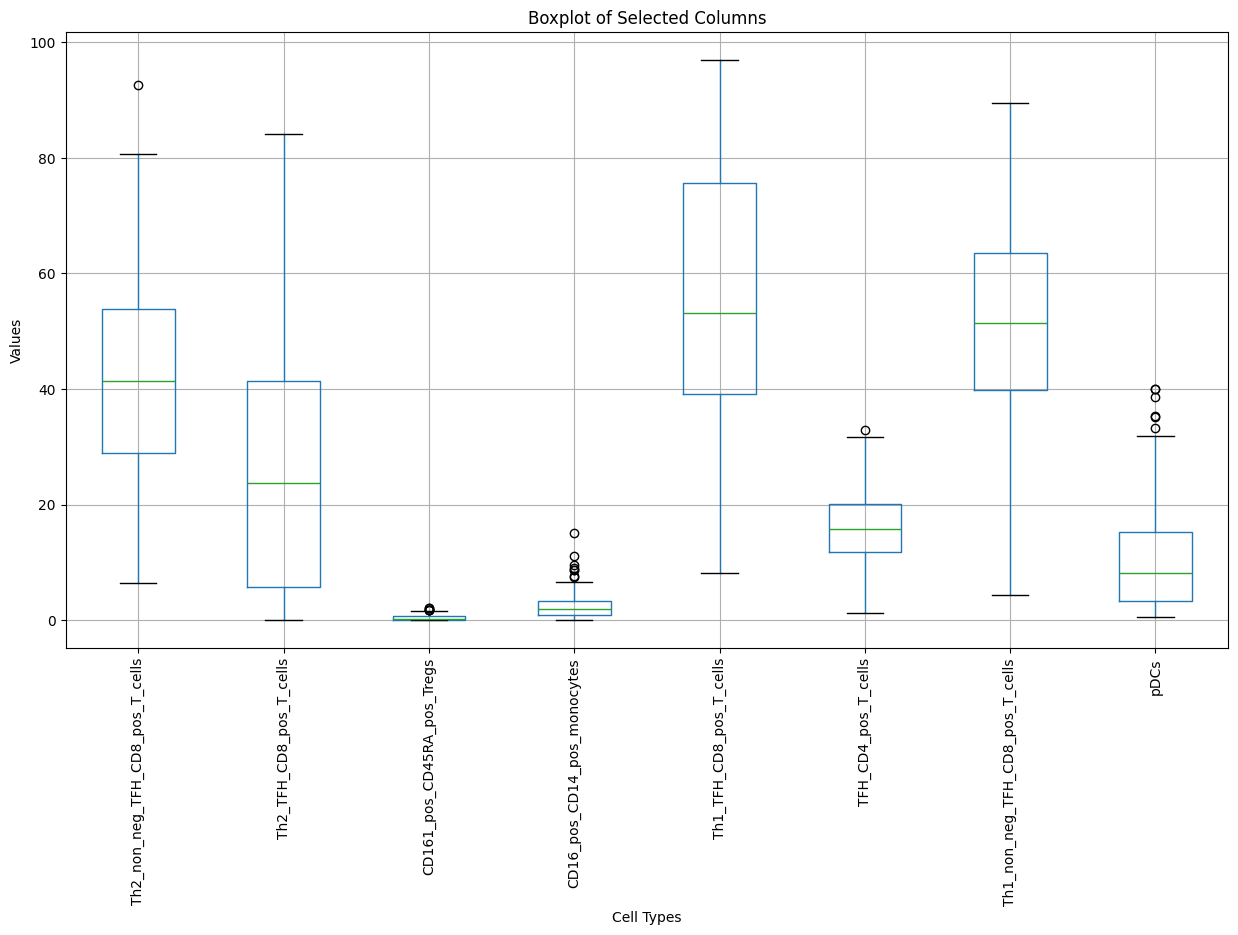

In [36]:
import matplotlib.pyplot as plt

# Drop 'donor_id' and 'vaccine_response' and plot the boxplot
df.drop(['donor_id', 'vaccine_response'], axis=1).boxplot(figsize=(15, 8), rot=90)
plt.title("Boxplot of Selected Columns")
plt.ylabel("Values")
plt.xlabel("Cell Types")
plt.show()

In [37]:
#we set vaccine_response as the prediction target

In [38]:
y = df.vaccine_response

In [39]:
#Make the columns with cell data the features

In [40]:
print(df.columns)

Index(['donor_id', 'vaccine_response', 'Th2_non_neg_TFH_CD8_pos_T_cells',
       'Th2_TFH_CD8_pos_T_cells', 'CD161_pos_CD45RA_pos_Tregs',
       'CD16_pos_CD14_pos_monocytes', 'Th1_TFH_CD8_pos_T_cells',
       'TFH_CD4_pos_T_cells', 'Th1_non_neg_TFH_CD8_pos_T_cells', 'pDCs'],
      dtype='object')


In [42]:
flu_features = ['donor_id', 'vaccine_response', 'Th2_non_neg_TFH_CD8_pos_T_cells',
       'Th2_TFH_CD8_pos_T_cells', 'CD161_pos_CD45RA_pos_Tregs',
       'CD16_pos_CD14_pos_monocytes', 'Th1_TFH_CD8_pos_T_cells',
       'TFH_CD4_pos_T_cells', 'Th1_non_neg_TFH_CD8_pos_T_cells', 'pDCs']
X = df[flu_features]

In [43]:
X.describe()

,donor_id,vaccine_response,Th2_non_neg_TFH_CD8_pos_T_cells,Th2_TFH_CD8_pos_T_cells,CD161_pos_CD45RA_pos_Tregs,CD16_pos_CD14_pos_monocytes,Th1_TFH_CD8_pos_T_cells,TFH_CD4_pos_T_cells,Th1_non_neg_TFH_CD8_pos_T_cells,pDCs
count,304.000000,304.000000,164.000000,163.000000,294.000000,163.000000,164.000000,164.000000,164.000000,164.000000
mean,348.855263,0.292763,41.755488,25.321902,0.417381,2.438037,56.306037,16.129390,51.609695,11.190976
std,212.634470,0.455781,17.752616,20.025311,0.488127,2.317019,22.200952,5.966753,16.392863,9.533273
min,3.000000,0.000000,6.490000,0.000000,0.000000,0.000000,8.150000,1.260000,4.290000,0.610000
25%,176.750000,0.000000,28.975000,5.665000,0.030000,0.830000,39.100000,11.875000,39.775000,3.387500
50%,323.500000,0.000000,41.400000,23.700000,0.205000,1.860000,53.200000,15.700000,51.400000,8.220000
75%,497.250000,1.000000,53.925000,41.350000,0.697500,3.360000,75.600000,20.175000,63.525000,15.325000
max,813.000000,1.000000,92.600000,84.100000,2.180000,15.100000,96.900000,32.900000,89.500000,40.000000


In [44]:
X.head()

,donor_id,vaccine_response,Th2_non_neg_TFH_CD8_pos_T_cells,Th2_TFH_CD8_pos_T_cells,CD161_pos_CD45RA_pos_Tregs,CD16_pos_CD14_pos_monocytes,Th1_TFH_CD8_pos_T_cells,TFH_CD4_pos_T_cells,Th1_non_neg_TFH_CD8_pos_T_cells,pDCs
0,813,0.0,33.7,20.00,1.66,1.55,10.0,9.33,62.2,14.80
1,812,0.0,27.8,8.41,0.43,1.33,79.4,18.80,68.4,5.67
2,811,0.0,32.3,7.14,0.51,0.58,71.4,14.80,63.0,14.60
3,810,0.0,73.2,5.30,0.17,1.29,85.6,21.00,24.0,15.40
4,809,0.0,24.0,4.59,0.20,0.55,39.4,17.20,70.5,4.92


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

flu_model = DecisionTreeRegressor(random_state=0)

flu_model.fit(train_X, train_y)

val_predictions = flu_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.11978221415607986


In [48]:
# print the top few validation predictions
print(flu_model.predict(val_X.head()))
# print the top few actual prices from validation data
print(val_y.head())

[1.         0.09195402 0.09195402 0.09195402 0.09195402]
66     1.0
156    1.0
247    0.0
267    0.0
145    0.0
Name: vaccine_response, dtype: float64


In [ ]:
# kijk wat het verschil is tussen de noemale date en de gebalanceerde data (SMOTE)